# This notebook has code written for use in the 2nd year project paper

In [43]:
#All of the imports and definitions
import numpy as np
from pragmaticModels import PragmaticModel
import utilities as util
from utilities import lexToMappingsRSAEquiv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline 

## RSA vs. Epistmeic for Frank and Goodman 2012 basic scalar implicature

----------------------------------------------------
RSA predictions
             Blue Square   Blue Circle  Green Square
    'Blue'        0.3846        0.6154           0.0
   'Green'           0.0           0.0           1.0
  'Circle'           0.0           1.0           0.0
  'Square'        0.3846           0.0        0.6154

----------------------------------------------------
Epistemic Predictions
             Blue Square   Blue Circle  Green Square
    'Blue'        0.3404        0.5936         0.066
   'Green'        0.0542        0.0946        0.8512
  'Circle'        0.0542        0.8512        0.0946
  'Square'        0.3404         0.066        0.5936



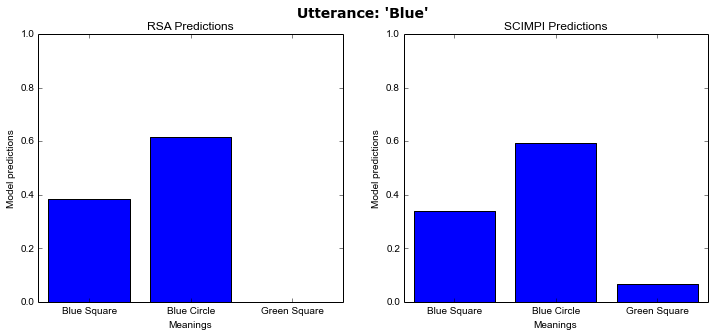

In [34]:
import pragmaticModels
reload( pragmaticModels)
from pragmaticModels import PragmaticModel
pri=[.2,.4,.4]#Frank and Goodman 2012 rough empirical priors
lex=[[1,1,0],[0,0,1],[0,1,0],[1,0,1]]#Frank and Goodman 2012 full lexicon
means=["Blue Square", "Blue Circle", "Green Square"]
utts= ["\'Blue\'","\'Green\'","\'Circle\'","\'Square\'"]
mapps = lexToMappingsRSAEquiv(lex, pri, .1) #RSA style relaxation for this lexicon
#mapps=np.array([[0.8, 0.1, 0.1],[0.1,0.1,0.8]])
rsaTest = PragmaticModel(modelType="RSA", lexicon=lex, meaningPriors=pri, alpha=1, meanings=means, utterances=utts)
epistTest = PragmaticModel(modelType="BeliefDecay", mappings=mapps, meaningPriors=pri, beliefStrength=1, meanings=means, utterances=utts)
rsaTest.display_listener_matrix(rsaTest.iterate(3), title="RSA predictions")
epistTest.display_listener_matrix(epistTest.iterate(2), title="Epistemic Predictions")

#Plotting Code
fig = plt.figure()
#fig = plt.gcf()
size = fig.get_size_inches()
plt.figure(figsize=(size[0]*2,size[0]*0.8))
gs = gridspec.GridSpec(1,2)
plt.suptitle("Utterance: \'Blue\'", fontsize=14, fontweight='bold')

toPlot=rsaTest.iterate(3)[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=rsaTest.meanings
locs=range(len(toPlot))
ax = plt.subplot(gs[0])
ax.bar(locs,toPlot, align='center')
ax.set_xlabel("Meanings")
ax.set_ylabel("Model predictions")
ax.set_title("RSA Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])

#pos1 = ax.get_position() # get the original position 
#pos2 = [pos1.x0 + 1.3, pos1.y0 + 0.0,  pos1.width / 1.0, pos1.height / 1.0] 
#ax.set_position(pos2)

ax2 = plt.subplot(gs[1])
toPlot=epistTest.iterate(2)[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=epistTest.meanings
locs=range(len(toPlot))
ax2.bar(locs,toPlot, align='center')
ax2.set_xlabel("Meanings")
ax2.set_ylabel("Model predictions")
ax2.set_title("SCIMPI Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])
#ax2.set_position(pos2)
#ax.set_position(pos1)
#plt.figure(2)
plt.show()

## Original SCIMPI vs. SCIMPI with extended language for Frank and Goodman 2012 basic scalar implicature
### Part 1: unlikely referents given langauge

This example illustrates what it looks like to add additional referents that are not likely given the utterance, but are not a priori unlikely as well as with additional utterances that have a low probability of referring to the relevant objects.

As is apparant below, the predicitons do not vary much. This illustrates the insensitivity to model extension with meanings that have a low probability given the speaker-produced utterance.

The RSA model is not capable of this, as it does not have a means by which to represent different conditional probabilities over utterances given meanings (different strengths of lingusitic mappings).

----------------------------------------------------
Original Epistemic Predictions
             Blue Square   Blue Circle  Green Square
    'Blue'        0.3404        0.5936         0.066
   'Green'        0.0542        0.0946        0.8512
  'Circle'        0.0542        0.8512        0.0946
  'Square'        0.3404         0.066        0.5936

-------------------------------------------------------------------------------------------------
Expanded Epistemic Predictions
                  Blue Square      Blue Circle     Green Square  Orange Triangle      Red Hexagon
      'Blue'           0.3326             0.58           0.0644           0.0115           0.0115
     'Green'           0.0529           0.0923           0.8309           0.0119           0.0119
    'Circle'           0.0529           0.8309           0.0923           0.0119           0.0119
    'Square'           0.3326           0.0644             0.58           0.0115           0.0115
  'Triangle'           0.0064  

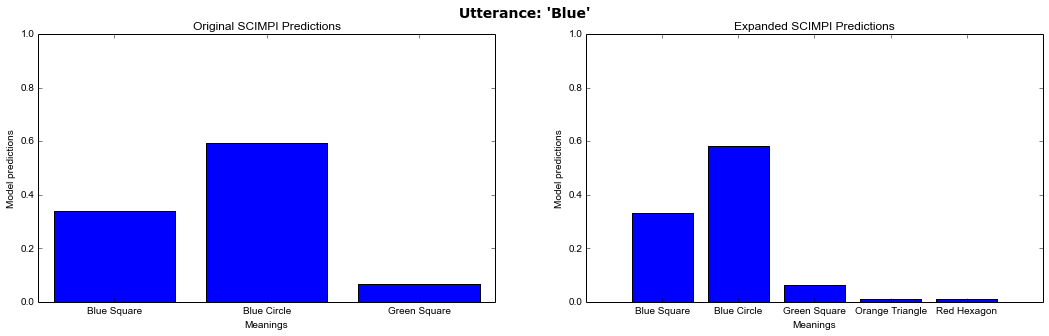

In [33]:
import pragmaticModels
reload( pragmaticModels)
from pragmaticModels import PragmaticModel
origPri=[.2,.4,.4]#Frank and Goodman 2012 rough empirical priors
lex=[[1,1,0],[0,0,1],[0,1,0],[1,0,1]]#Frank and Goodman 2012 full lexicon
origMeans=["Blue Square", "Blue Circle", "Green Square"]
origUtts= ["\'Blue\'","\'Green\'","\'Circle\'","\'Square\'"]
origMaps = lexToMappingsRSAEquiv(lex, origPri, .1) #RSA style relaxation for this lexicon

newMapps = np.append(origMaps, np.array([[0.01,0.01,0.01,0.01]]), axis=0)
newMapps = np.append(newMapps, np.array([[0.01,0.01,0.01,0.01]]), axis=0)
newMapps = np.append(newMapps, np.array([[0.01],[0.01],[0.01],[1.0],[0.01]]), axis=1)
newMapps = np.append(newMapps, np.array([[0.01],[0.01],[0.01],[0.01],[1.0]]), axis=1)

newPriUnNorm=np.array(origPri + [0.3, 0.3])
newPri=newPriUnNorm/sum(newPriUnNorm)
newMeans=["Blue Square", "Blue Circle", "Green Square", "Orange Triangle", "Red Hexagon"]
newUtts= ["\'Blue\'","\'Green\'","\'Circle\'","\'Square\'","\'Triangle\'", "\'Hexagon\'"]

#mapps=np.array([[0.8, 0.1, 0.1],[0.1,0.1,0.8]])
epistTestOrig = PragmaticModel(modelType="BeliefDecay", mappings=origMaps, meaningPriors=origPri, beliefStrength=1, meanings=origMeans, utterances=origUtts)
epistTestNew = PragmaticModel(modelType="BeliefDecay", mappings=newMapps, meaningPriors=newPri, beliefStrength=1, meanings=newMeans, utterances=newUtts)

originalPreds=epistTestOrig.iterate(2)
newPreds=epistTestNew.iterate(2)
epistTestOrig.display_listener_matrix(originalPreds, title="Original Epistemic Predictions")
epistTestNew.display_listener_matrix(newPreds, title="Expanded Epistemic Predictions")

#Plotting Code
#fig = plt.figure()
#fig = plt.gcf()
size = fig.get_size_inches()
plt.figure(figsize=(size[0]*3,size[0]*0.8))
gs = gridspec.GridSpec(1,2)
plt.suptitle("Utterance: \'Blue\'", fontsize=14, fontweight='bold')

toPlot=originalPreds[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=epistTestOrig.meanings
locs=range(len(toPlot))
ax = plt.subplot(gs[0])
ax.bar(locs,toPlot, align='center')
ax.set_xlabel("Meanings")
ax.set_ylabel("Model predictions")
ax.set_title("Original SCIMPI Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])

#pos1 = ax.get_position() # get the original position 
#pos2 = [pos1.x0 + 1.3, pos1.y0 + 0.0,  pos1.width / 1.0, pos1.height / 1.0] 
#ax.set_position(pos2)

ax2 = plt.subplot(gs[1])
toPlot=newPreds[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=epistTestNew.meanings
locs=range(len(toPlot))
ax2.bar(locs,toPlot, align='center')
ax2.set_xlabel("Meanings")
ax2.set_ylabel("Model predictions")
ax2.set_title("Expanded SCIMPI Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])
#ax2.set_position(pos2)
#ax.set_position(pos1)
#plt.figure(2)
plt.show()

### Part 2: Unlikely meanings a priori

The following is designed to illustrate the scenario where the meanings are unlikely a priori (as in the case where they are not visible to the speaker or to the listener and are therefore not visible a priori.

Here the predicitons for the additional meanings are low even though they are not unlikely given the utterance. It illustrates how the epistemic model allows us to build relevance theoretic and salience-based predictions into the model framework.

----------------------------------------------------
Original SCIMPI Predictions
             Blue Square   Blue Circle  Green Square
    'Blue'        0.3404        0.5936         0.066
   'Green'        0.0542        0.0946        0.8512
  'Circle'        0.0542        0.8512        0.0946
  'Square'        0.3404         0.066        0.5936

---------------------------------------------------------------------------------------
Expanded SCIMPI Predictions
                Blue Square    Blue Circle   Green Square  Blue Triangle     Red Square
      'Blue'         0.3284         0.5966         0.0663         0.0078         0.0009
     'Green'         0.0521         0.0945         0.8509         0.0012         0.0012
       'Red'         0.2053          0.373          0.373         0.0049         0.0438
    'Circle'         0.0521         0.8509         0.0945         0.0012         0.0012
    'Square'         0.3284         0.0663         0.5966         0.0009         0.0078
  'Triang

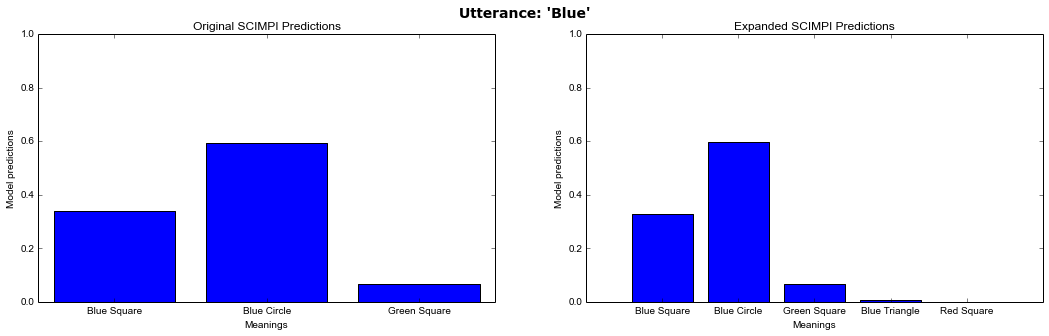

In [35]:
import pragmaticModels
reload( pragmaticModels)
from pragmaticModels import PragmaticModel
origPri=[.2,.4,.4]#Frank and Goodman 2012 rough empirical priors
origLex=[[1,1,0],[0,0,1],[0,1,0],[1,0,1]]#Frank and Goodman 2012 full lexicon
origMeans=["Blue Square", "Blue Circle", "Green Square"]
origUtts= ["\'Blue\'","\'Green\'","\'Circle\'","\'Square\'"]
origMaps = lexToMappingsRSAEquiv(origLex, origPri, .1) #RSA style relaxation for this lexicon

newLex=[[1,1,0,1,0],[0,0,1,0,0],[0,0,0,0,1],[0,1,0,0,0],[1,0,1,0,1],[0,0,0,1,0]]#Frank and Goodman 2012 full lexicon
newPriUnNorm=np.array(origPri + [0.01, 0.01])
newPri=newPriUnNorm/sum(newPriUnNorm)
newMaps = lexToMappingsRSAEquiv(newLex, newPri, .1) #RSA style relaxation for this lexicon
newMeans=["Blue Square", "Blue Circle", "Green Square", "Blue Triangle", "Red Square"]
newUtts= ["\'Blue\'","\'Green\'","\'Red\'","\'Circle\'","\'Square\'","\'Triangle\'"]

#mapps=np.array([[0.8, 0.1, 0.1],[0.1,0.1,0.8]])
epistTestOrig = PragmaticModel(modelType="BeliefDecay", mappings=origMaps, meaningPriors=origPri, beliefStrength=1, meanings=origMeans, utterances=origUtts)
epistTestNew = PragmaticModel(modelType="BeliefDecay", mappings=newMaps, meaningPriors=newPri, beliefStrength=1, meanings=newMeans, utterances=newUtts)

originalPreds=epistTestOrig.iterate(2)
newPreds=epistTestNew.iterate(2)
epistTestOrig.display_listener_matrix(originalPreds, title="Original SCIMPI Predictions")
epistTestNew.display_listener_matrix(newPreds, title="Expanded SCIMPI Predictions")

#Plotting Code
#fig = plt.figure()
#fig = plt.gcf()
size = fig.get_size_inches()
plt.figure(figsize=(size[0]*3,size[0]*0.8))
gs = gridspec.GridSpec(1,2)
plt.suptitle("Utterance: \'Blue\'", fontsize=14, fontweight='bold')

toPlot=originalPreds[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=epistTestOrig.meanings
locs=range(len(toPlot))
ax = plt.subplot(gs[0])
ax.bar(locs,toPlot, align='center')
ax.set_xlabel("Meanings")
ax.set_ylabel("Model predictions")
ax.set_title("Original SCIMPI Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])

#pos1 = ax.get_position() # get the original position 
#pos2 = [pos1.x0 + 1.3, pos1.y0 + 0.0,  pos1.width / 1.0, pos1.height / 1.0] 
#ax.set_position(pos2)

ax2 = plt.subplot(gs[1])
toPlot=newPreds[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=epistTestNew.meanings
locs=range(len(toPlot))
ax2.bar(locs,toPlot, align='center')
ax2.set_xlabel("Meanings")
ax2.set_ylabel("Model predictions")
ax2.set_title("Expanded SCIMPI Predictions") 
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])
#ax2.set_position(pos2)
#ax.set_position(pos1)
#plt.figure(2)
plt.show()

**Of course, this is not too different from the predictions of an equivalent RSA model.**

**This can be seen below:**

---------------------------------------------------------------------------------------
Expanded RSA Predictions
                Blue Square    Blue Circle   Green Square  Blue Triangle     Red Square
      'Blue'         0.3284         0.5966         0.0663         0.0078         0.0009
     'Green'         0.0521         0.0945         0.8509         0.0012         0.0012
       'Red'         0.2053          0.373          0.373         0.0049         0.0438
    'Circle'         0.0521         0.8509         0.0945         0.0012         0.0012
    'Square'         0.3284         0.0663         0.5966         0.0009         0.0078
  'Triangle'         0.2053          0.373          0.373         0.0438         0.0049



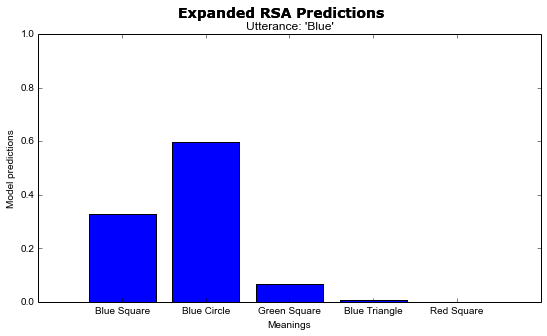

In [26]:
rsaTestNew = PragmaticModel(modelType="RSA", lexicon=newLex, meaningPriors=newPri, meanings=newMeans, utterances=newUtts)
newRSAPreds=epistTestNew.iterate(2)
rsaTestNew.display_listener_matrix(newRSAPreds, title="Expanded RSA Predictions")


#Plotting Code
#fig = plt.figure()
#fig = plt.gcf()
size = fig.get_size_inches()
plt.figure(figsize=(size[0]*1.5,size[0]*0.8))
gs = gridspec.GridSpec(1,2)
plt.suptitle("Utterance: \'Blue\'", fontsize=14, fontweight='bold')

toPlot=newRSAPreds[0,:]
epsilon = 1e-7
toPlot = [x+epsilon for x in toPlot]
labels=rsaTestNew.meanings
locs=range(len(toPlot))
plt.bar(locs,toPlot, align='center')
plt.xlabel("Meanings")
plt.ylabel("Model predictions")
plt.title("Utterance: \'Blue\'") 
plt.suptitle("Expanded RSA Predictions", fontsize=14, fontweight='bold')
plt.xticks(locs, labels)
axes = plt.gca()
axes.set_ylim([0,1])
#plt.figure(2)
plt.show()

**However, the epistemic model allows much more flexibility than the RSA model even here.**

This is because of the interaction between the priors and the likelihoods. Although the epistemic and RSa model treat priors equivalently, the fact that the priors interact with the likelihoods allows for a low prior probability meaning to still have a non-trivial prediciton if the probability of that meaning given the utterance is sufficiently high

## RSA vs. SCIMPI for the case of specificity implicatures

Specificity implicatures reflect the idea that a more specific alternative utterance will be said when it applies because it is more informative than the less specific alternative utterance. This is otherwise known as a Horn Implicature.

The most famous case of these implicatures is that of "some" vs. "all" where the meaning of "some" is strengthened to mean not all because the listener believes that the speaker would have said "all" if she meant all.

[This is complicated by the case where the speaker does not have knowledge, but this can be treated somewhere else...]

RSA handles this by postulating uncertainty over the lexicon that the speaker is using...

The epistemic model simply handles this by representing the listener's beliefs about how speakers use the words...
This is a considerably simpler and better motivated account...

Below I show the Epistemic model predictions for this phenomenon.

[Should also show the RSA predictions to illustrate the similarity.]

----------------------------------------------------
SCIMPI predictions for specificity implicatures (merged)
                  Some but not all               All
           'All'             0.161             0.839
          'Some'            0.6333            0.3667
  Null utterance            0.6333            0.3667

--------------------------------------------
SCIMPI predictions for specificity implicatures (direct)
          Some but not all               All
   'All'             0.125             0.875
  'Some'              0.75              0.25



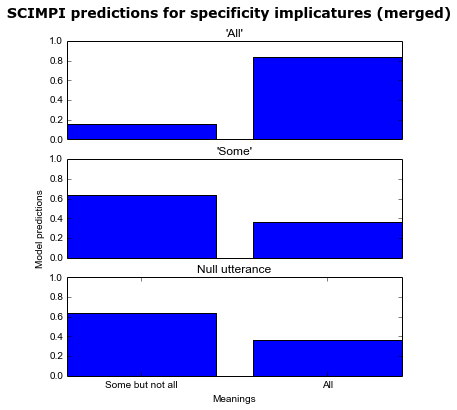

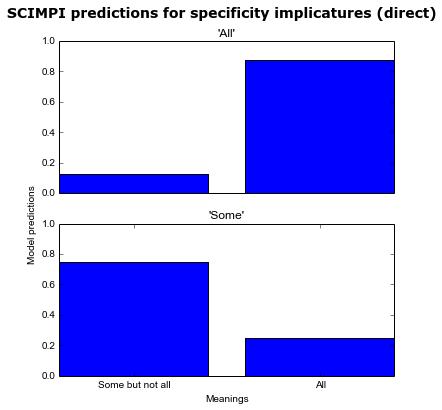

In [38]:
import pragmaticModels
reload( pragmaticModels)
from pragmaticModels import PragmaticModel
from utilities import mergeLexicaIntoMappings

l1=[[0,1],[1,1],[1,1]]
l2=[[0,1],[1,0],[1,1]]
l3=[[0,1],[0,1],[1,1]]
lexica=[l1,l2,l3]
mergedMaps = mergeLexicaIntoMappings(lexica, 0.1)
reasonableMaps=np.array([[0.1,0.9],[0.7,0.3]])

means=["Some but not all", "All"]
uttsMerged=["\'All\'", "\'Some\'", "Null utterance"]
uttsDirect=["\'All\'", "\'Some\'"]

epistTestMerged = PragmaticModel(modelType="BeliefDecay", mappings=mergedMaps, beliefStrength=1, meanings=means, utterances=uttsMerged)
epistTestDirect = PragmaticModel(modelType="BeliefDecay", mappings=reasonableMaps, beliefStrength=1, meanings=means, utterances=uttsDirect)

mergedPreds=epistTestMerged.iterate(2)
directPreds=epistTestDirect.iterate(2)
epistTestMerged.display_listener_matrix(mergedPreds, title="SCIMPI predictions for specificity implicatures (merged)")
epistTestDirect.display_listener_matrix(directPreds, title="SCIMPI predictions for specificity implicatures (direct)")

gridPlotPredictions(epistTestMerged, mergedPreds, "SCIMPI predictions for specificity implicatures (merged)")
gridPlotPredictions(epistTestDirect, directPreds, "SCIMPI predictions for specificity implicatures (direct)")


This leads me to expect that the model will be able to handle other phenomena that RSA captures using lifted variable margenalization

## Development of pragmatic scales

The key feature that needs to be represented in a developmental model is the acquisition of knowledge both about word meanings, and about the contexts in which words are used (which comprises the expected alternative utterances.)

Recent results in the development of pragmatic inference suggests that children do not form certain pragmatic inferneces, not because they lack the ablity to make such inferences, but because they lack the relevant domain knowledge. It is claimed that the knowledge they lack is that of the alternative utterances that speakers might say in a given scenario or context. Without this knowledge, children would be unable to make conterfactual inferences of the form often theorised to be driving specificity implicatures or Horn Implicatures that lie on a lexical scale.

The epistemic model of pragmatics captures the way in which this lack of strong knowledge about language use (or a lack of strong expectations about alternative utterances) might cause children to interpret language in a more "literal" manner rather than in a pragmatically enhanced one.

------------------------------------------------------------------------------------------------------
SCIMPI predictions for adult knowledge on specificity implicatures
                                    Some but not all                      All  Other possible meanings
                      'All'                   0.0588                   0.7647                   0.1765
                     'Some'                   0.7273                   0.2273                   0.0455
  Other possible utterances                   0.1429                   0.0952                   0.7619

------------------------------------------------------------------------------------------------------
SCIMPI predictions for child knowledge on specificity implicatures
                                    Some but not all                      All  Other possible meanings
                      'All'                   0.0208                   0.9479                   0.0312
                     'Some'              

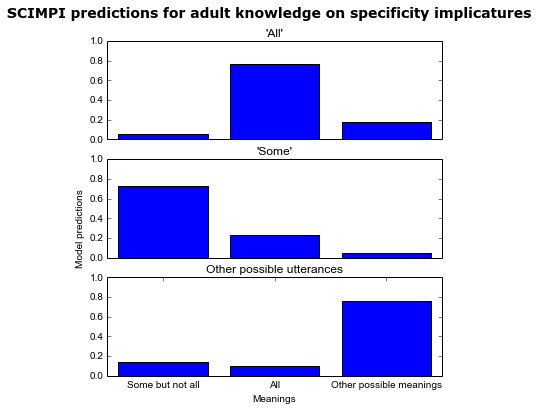

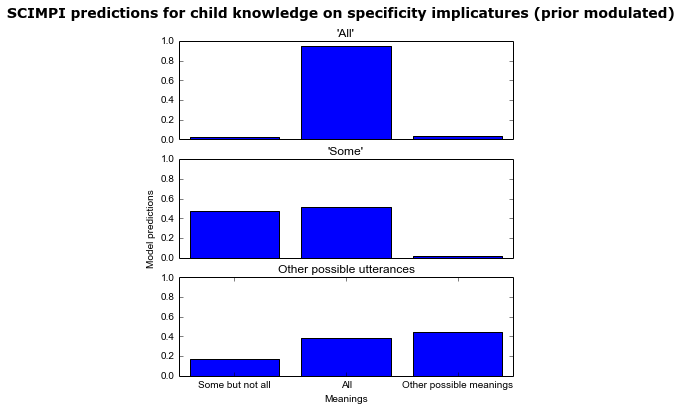

In [40]:
#Developmental model

reasonableMapsAdult=np.array([[0.05,0.8,0.15],[0.65,0.25,0.1], [0.15,0.05,0.8]])
reasonableMapsChild=np.array([[0.05,0.8,0.15],[0.65,0.25,0.1], [0.15,0.05,0.8]])#A child who doesn't know the word "all" in relation to "some"

priorsChild=[.2,0.7,0.1]#Might want to change these depending on the theory

means=["Some but not all", "All", "Other possible meanings"]
#Justify the auxilliary thing by arguing that it represents the joint contribution of other things that might be communicated
utts=["\'All\'", "\'Some\'", "Other possible utterances"]
#Justify the auxilliary thing by arguing that it represents the joint contribution of other things that might be said

#Might want to include a meaning for "some and possibly including all"

epistTestAdult = PragmaticModel(modelType="BeliefDecay", mappings=reasonableMapsAdult, beliefStrength=1, meanings=means, utterances=utts)
epistTestChild = PragmaticModel(modelType="BeliefDecay", mappings=reasonableMapsChild, beliefStrength=1, meaningPriors=priorsChild, meanings=means, utterances=utts)

adultPreds=epistTestAdult.iterate(2)
childPreds=epistTestChild.iterate(2)
epistTestAdult.display_listener_matrix(adultPreds, title="SCIMPI predictions for adult knowledge on specificity implicatures")
epistTestChild.display_listener_matrix(childPreds, title="SCIMPI predictions for child knowledge on specificity implicatures")

reload(util)
from utilities import gridPlotPredictions

gridPlotPredictions(epistTestAdult, adultPreds, "SCIMPI predictions for adult knowledge on specificity implicatures")
gridPlotPredictions(epistTestChild, childPreds, "SCIMPI predictions for child knowledge on specificity implicatures (prior modulated)")

Here we see that...

------------------------------------------------------------------------------------------------------
SCIMPI predictions for child knowledge on specificity implicatures
                                    Some but not all                      All  Other possible meanings
                      'All'                   0.3333                   0.3333                   0.3333
                     'Some'                   0.4706                   0.4706                   0.0588
  Other possible utterances                      0.1                      0.1                      0.8



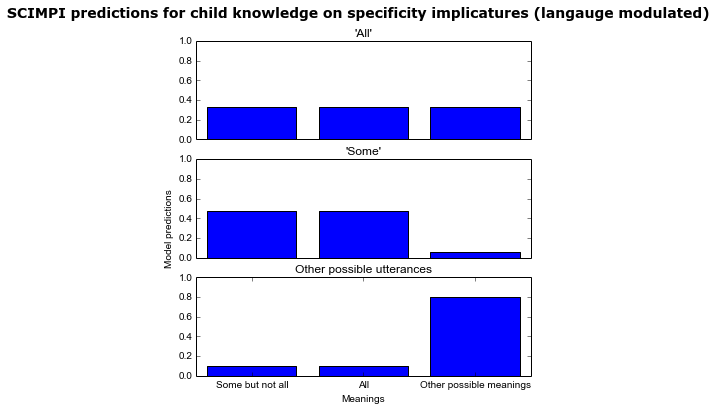

In [39]:
#Developmental model

reasonableMapsChild=np.array([[0.1,0.8,0.1],[0.1,0.8,0.1], [0.1,0.1,0.8]])#A child who doesn't know the word "all" in relation to "some"


means=["Some but not all", "All", "Other possible meanings"]
#Justify the auxilliary thing by arguing that it represents the joint contribution of other things that might be communicated
utts=["\'All\'", "\'Some\'", "Other possible utterances"]
#Justify the auxilliary thing by arguing that it represents the joint contribution of other things that might be said

#Might want to include a meaning for "some and possibly including all"

epistTestChild = PragmaticModel(modelType="BeliefDecay", mappings=reasonableMapsChild, beliefStrength=1, meanings=means, utterances=utts)

childPreds=epistTestChild.iterate(2)
epistTestChild.display_listener_matrix(childPreds, title="SCIMPI predictions for child knowledge on specificity implicatures")

reload(util)
from utilities import gridPlotPredictions

gridPlotPredictions(epistTestChild, childPreds, "SCIMPI predictions for child knowledge on specificity implicatures (langauge modulated)")

In [42]:
from pragmods import Pragmod
TT = [1.0, 1.0]
TF = [1.0, 0.0]
FT = [0.0, 1.0]

# Semantics for the null message fixed for all lexica:
nullsem = [1.0, 1.0]

# The nine logically distinct lexica -- message rows, world columns:
lexica = [
    np.array([TT, TT, nullsem]),
    np.array([TT, TF, nullsem]),
    np.array([TT, FT, nullsem]),
    np.array([TF, TT, nullsem]),
    np.array([TF, TF, nullsem]),
    np.array([TF, FT, nullsem]),
    np.array([FT, TT, nullsem]),
    np.array([FT, TF, nullsem]),
    np.array([FT, FT, nullsem])]

# General model with the temperature parameter (lambda) set aggressively:
mod = Pragmod(
    lexica=lexica,
    messages=['\"some\"', '\"all\"', 'null'], # Messsages and
    states=['some but not all', 'all'],               # World-types and      
    prior=np.array([0.5, 0.5]),                      # their prior.
    lexprior=np.repeat(1.0/len(lexica), len(lexica)),        # Flat lex prior.
    temperature=1.0,
    alpha=1.0, 
    beta=1.0) # Relevant only for the anxious experts model.

# Compare the final listeners (display=True for full model output):
# Iteration depth (sort of arbitrary here):
n = 3


# Basic lexical uncertainty model:
lulangs = mod.run_uncertainty_model(n=n, display=False)
mod.display_listener_matrix(lulangs[-1], title=" - Lexical uncertainty model")       



--------------------------------------------
L - Lexical uncertainty model
          some but not all               all
  "some"               0.5               0.5
   "all"               0.5               0.5
    null               0.5               0.5

